In [1]:
import csv
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime as dt

PATH = '/Users/rajjix/Precis/precis_prediction_api/backend_L2_input.csv'
WEATHER_DATA = '/Users/rajjix/Precis/precis_prediction_api/weather_data.csv'


with open(PATH) as csv_file:
    data = csv.DictReader(csv_file)
    ads_data = [x for x in data]


def get_sum_of_value(value, date):
    return sum([int(x[value]) for x in ads_data if x["day"] == date])

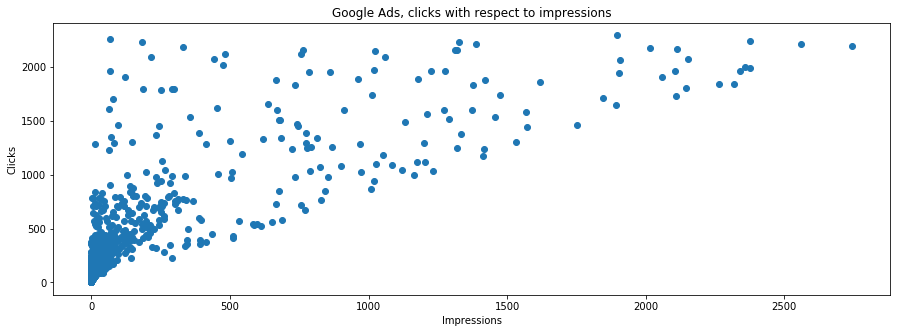

In [2]:
# Main plot for all accounts (clicks with respect to impressions)
plt.rcParams['figure.figsize'] = [15, 5]

plt.title("Google Ads, clicks with respect to impressions")

# plt.xticks(np.arange(0, 2500, 250))
# plt.yticks(np.arange(0, 3000, 300))

plt.ylabel('Clicks')
clicks = [int(x["impressions"]) for x in ads_data]

plt.xlabel('Impressions')
impressions = [int(x["clicks"]) for x in ads_data]

plt.scatter(impressions, clicks)
plt.show()

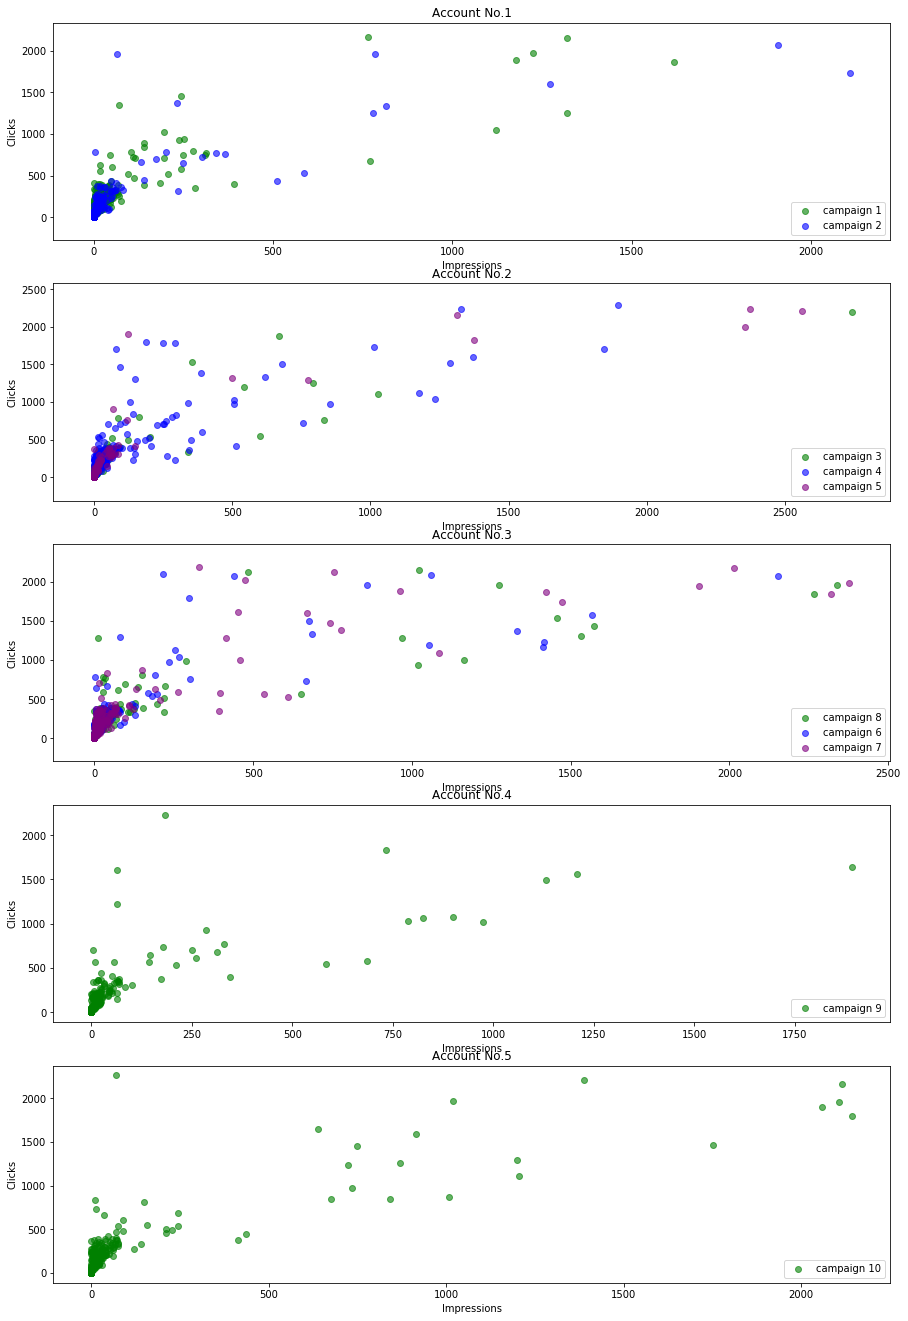

In [3]:
account_ids = [1, 2, 3, 4, 5]
colors = ['green', 'blue', 'purple', 'yellow']
fig, axs = plt.subplots(len(account_ids))

def plot_impressions_to_clicks(sub_id, account_id):
    axs[sub_id].title.set_text(f"Account No.{account_id}")
    
    ads_for_account = [x for x in ads_data if int(x["accountId"]) == account_id]
    campaigns_ids = list(set((int(x["campaignId"]) for x in ads_for_account)))
    
    for index, cid in enumerate(campaigns_ids):
        ads_for_campaign = [x for x in ads_for_account if int(x["campaignId"]) == cid]             
        clicks = [int(x["impressions"]) for x in ads_for_campaign]
        impressions = [int(x["clicks"]) for x in ads_for_campaign]
        axs[sub_id].scatter(impressions, clicks, alpha=0.6, c=colors[index], label=f"campaign {cid}")
    
    axs[sub_id].set_ylabel("Clicks")
    axs[sub_id].set_xlabel("Impressions")
    axs[sub_id].legend(loc='lower right')


for index, account in enumerate(account_ids):
    plot_impressions_to_clicks(index, account)
    
plt.subplots_adjust(bottom=0, top=3.5)
plt.show()


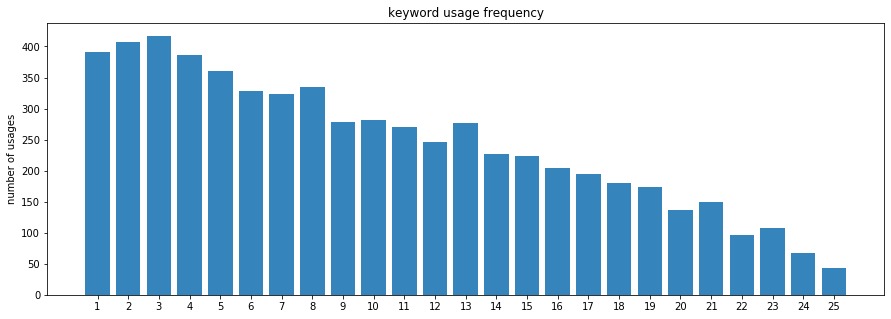

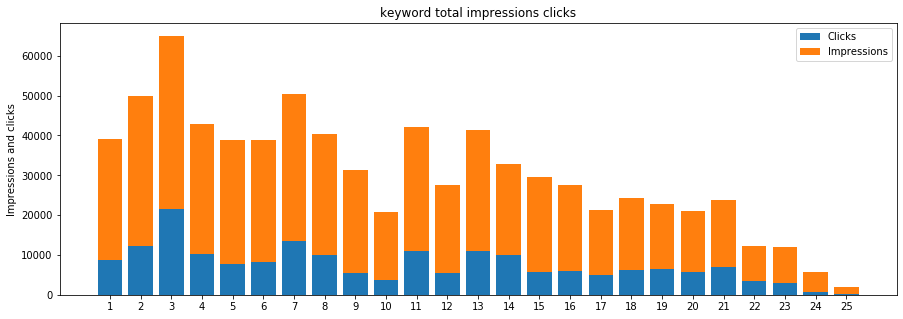

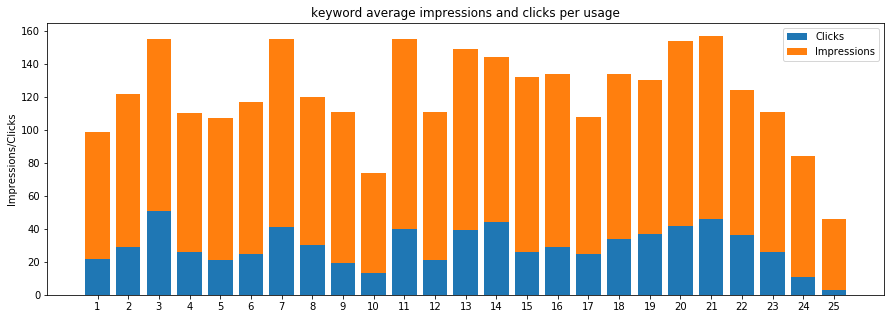

In [4]:
## Keyword analysis.
plt.rcParams['figure.figsize'] = [15, 5]

# How many times has each keyword been used.
keywords_usage_frequency = [len([x for x in ads_data if int(x["keywordId"]) == y]) for y in range(1, 26)]

# Number of clicks for each keyword in order 1 -> 25
keywords_total_clicks = [sum([int(x["clicks"]) for x in ads_data if int(x["keywordId"]) == y]) for y in range(1, 26)]
keywords_total_impressions = [sum([int(x["impressions"]) for x in ads_data if int(x["keywordId"]) == y]) for y in range(1, 26)]

# Average number of clicks per usage.
keyword_clicks_perusage = [int(x/y) for x, y in zip(keywords_total_clicks, keywords_usage_frequency)]
keyword_impressions_perusage = [int(x/y) for x, y in zip(keywords_total_impressions, keywords_usage_frequency)]

# Average number of clicks per keyword.
average_clicks_per_keyword = sum(keywords_total_clicks)/len(keywords_total_clicks)
average_impressions_per_keyword = sum(keywords_total_impressions)/len(keywords_total_impressions)

objects = [x for x in range(1, 26)]
y_pos = np.arange(len(objects))

plt.title('keyword usage frequency')
plt.ylabel('number of usages')
plt.xticks(y_pos, objects)
plt.bar(y_pos, keywords_usage_frequency, align='center', alpha=0.9)
plt.show()

plt.title('keyword total impressions clicks')
plt.ylabel('Impressions and clicks')
plt.xticks(y_pos, objects)
p1 = plt.bar(y_pos, keywords_total_clicks, 0.8)
p2 = plt.bar(y_pos, keywords_total_impressions, 0.8, bottom=keywords_total_clicks)
plt.legend((p1[0], p2[0]), ('Clicks', 'Impressions'))
plt.show()


plt.title('keyword average impressions and clicks per usage')
plt.ylabel('Impressions/Clicks')
plt.xticks(y_pos, objects)
p1 = plt.bar(y_pos, keyword_clicks_perusage, 0.8)
p2 = plt.bar(y_pos, keyword_impressions_perusage, 0.8, bottom=keyword_clicks_perusage)
plt.legend((p1[0], p2[0]), ('Clicks', 'Impressions'))
plt.show()

In [5]:
## Load Weather data.
with open(WEATHER_DATA) as csv_file:
    data = csv.DictReader(csv_file)
    # removed extreme data value on 23
    weather_data = [x for x in data if x["date"] not in ["2018-10-23"]] # "2018-10-03"]]

weather_data.sort(key=lambda x: dt.strptime(x['date'], '%Y-%m-%d'))


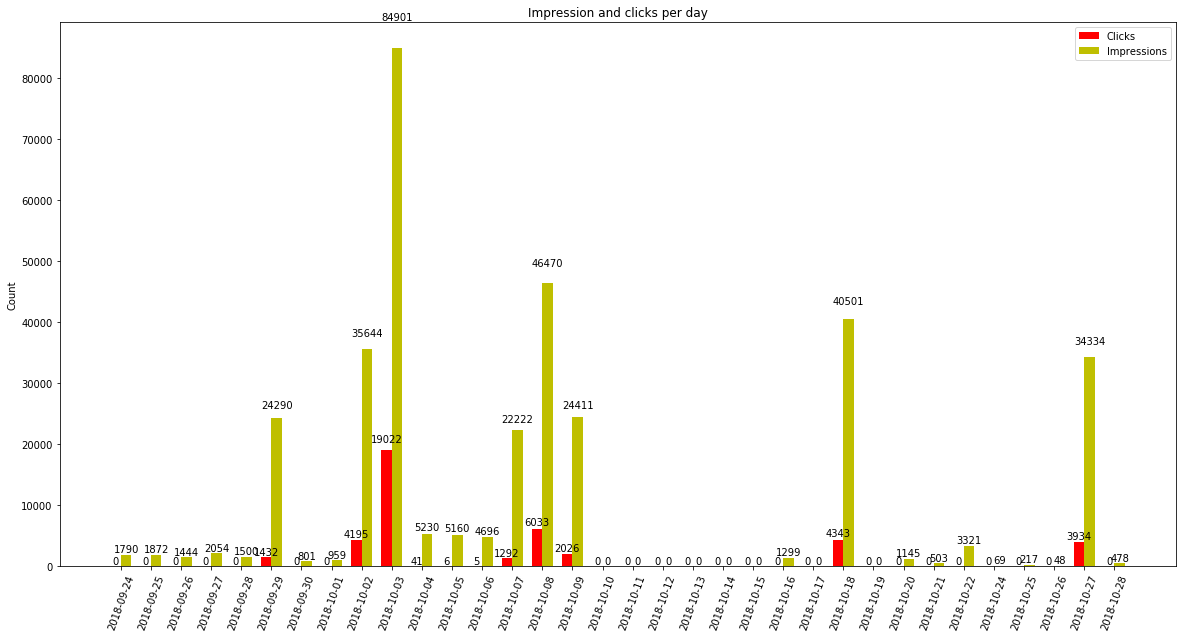

In [6]:
## Impressions and clicks per day analisys.

fig, ax = plt.subplots(figsize=(20, 10))

clicks = [get_sum_of_value("clicks", date) for date in [y["date"] for y in weather_data]]
impressions = [get_sum_of_value("impressions", date) for date in [y["date"] for y in weather_data]]

objects = [x["date"] for x in weather_data]

indices = np.arange(len(objects))
width = 0.35 

clicks_bar = ax.bar(indices, clicks, width, color='r')

impressions_bar = ax.bar(indices + width, impressions, width, color='y')

ax.set_ylabel('Count')
ax.set_title('Impression and clicks per day')
ax.set_xticks(indices + width / 2,)
ax.set_xticklabels(objects, rotation=70)


# plt.xticks(ind, objects, rotation=70)
ax.legend((clicks_bar[0], impressions_bar[0]), ('Clicks', 'Impressions'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(clicks_bar)
autolabel(impressions_bar)

plt.show()

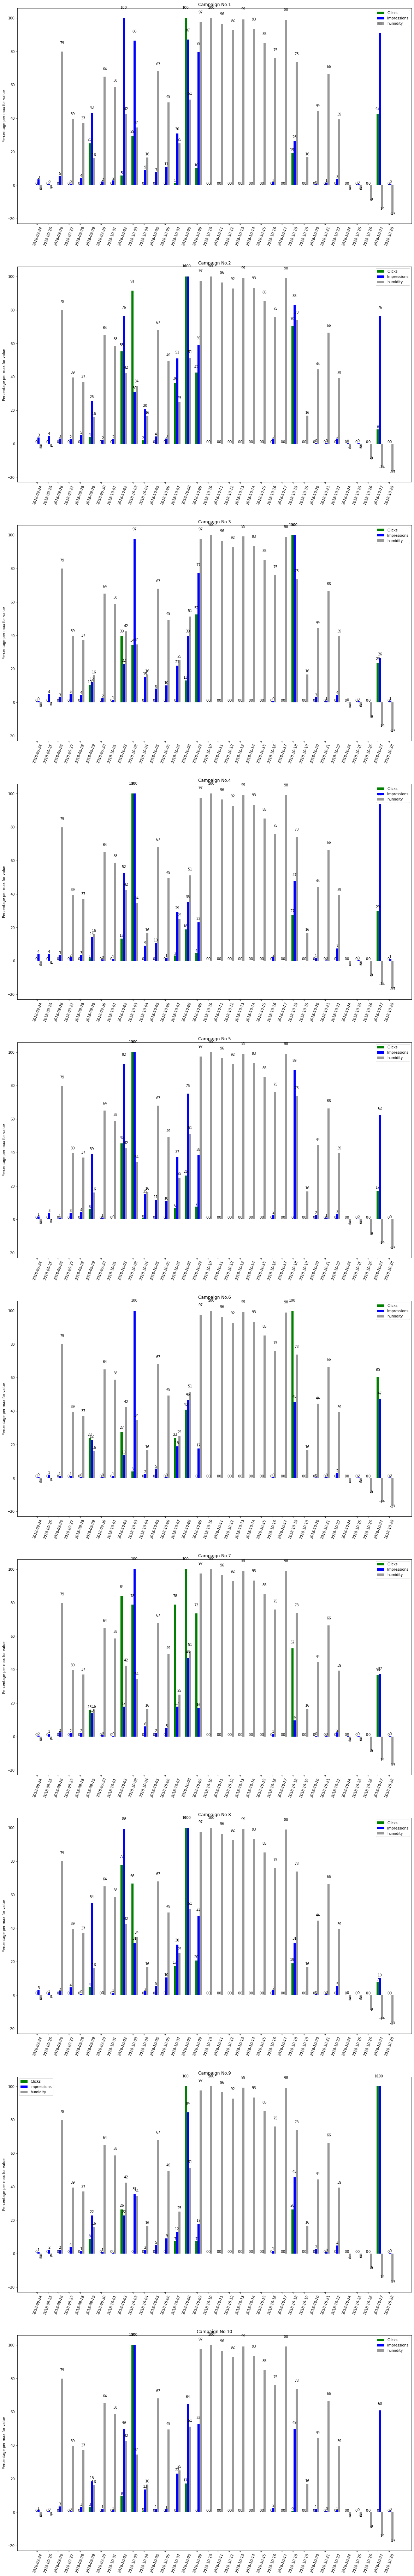

In [7]:
campaign_ids = sorted(list(set(int(x["campaignId"]) for x in ads_data)))
# We have 10 campaings => 10 subplots.

width=0.2
fig, ax = plt.subplots(len(campaign_ids), figsize=(20, 10))

## If we had more data samples we could have aggregated most of it into weekly or monthly. 

def average_temp(campaign_id):
    temp_low = [float(x["temperatureMin"]) for x in weather_data]
    temp_high = [float(x["temperatureMax"]) for x in weather_data]
    average_temp = [int((low+high)//2) for low, high in zip(temp_low, temp_high)]
    return average_temp

def get_data_per_campaign(campaign_id, value, date):
    return next(x[value] for x in ads_data if x["day"] == date and int(x["campaignId"])==int(campaign_id))

def draw_scatter_for_campaigns(plot_id, campaign_id, weather_indicator):
    ax[plot_id].title.set_text(f"Campaign No.{campaign_id}")
    
    ads_for_campaign = [x for x in ads_data if int(x["campaignId"]) == campaign_id]
    objects = [x["date"] for x in weather_data]
    indices = np.arange(len(objects))

    clicks = [int(get_data_per_campaign(campaign_id, "clicks", date)) for date in [y["date"] for y in weather_data]]
    impressions = [int(get_data_per_campaign(campaign_id, "impressions", date)) for date in [y["date"] for y in weather_data]]
    
    if weather_indicator == "temperatureAverage":
        weather_indicator = average_temp(campaign_id)
    else:
        weather_indicator = [float(x[weather_indicator]) for x in weather_data]
    
    # I tried using percentage with respect to the max value of each indicator over the given period
    # to see how much percent it increased ot decreased in the given time period.
    max_clicks = max(clicks)
    max_impressions = max(impressions)
    max_weather_indicator = max(weather_indicator)
    
    clicks = [(100*x)/max_clicks for x in clicks]
    impressions = [(100*x)/max_impressions for x in impressions]
    weather_indicator = [(100*x)/max_weather_indicator for x in weather_indicator]
    
    clicks_bar = ax[plot_id].bar(indices, clicks, width, color='green')
    impressions_bar = ax[plot_id].bar(indices + width, impressions, width, color='b')
    weather_indicator_bar = ax[plot_id].bar(indices + 2*width, weather_indicator, width, color='black', alpha=0.4)

    
    
    ax[plot_id].legend((clicks_bar[0], impressions_bar[0], weather_indicator_bar[0]), ('Clicks', 'Impressions', 'humidity'))

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax[plot_id].text(rect.get_x() + rect.get_width()/2., 1.05*height,
                    '%d' % int(height),
                    ha='center', va='bottom')

    autolabel(clicks_bar)
    autolabel(impressions_bar)
    autolabel(weather_indicator_bar)

    ax[plot_id].set_xticks(indices, objects)
    ax[plot_id].set_ylabel('Percentage per max for value')
    ax[plot_id].set_xticks(indices + width / 2,)
    ax[plot_id].set_xticklabels(objects, rotation=70)


    
    
for index, account in enumerate(campaign_ids):
    draw_scatter_for_campaigns(index, account, "dewPoint")

plt.subplots_adjust(bottom=0, top=10)
plt.show()


In [8]:
## Change Rate
def get_change_rate(values):
    return [100*(previous - new)/new for previous, new in zip(values, prices[1:])]
